# Importation des librairies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [30]:
%matplotlib inline
data_path="data/"
print(os.listdir())

['example.py', 'notes.txt', 'notebook-gridsearch.ipynb', 'data', '.ipynb_checkpoints', 'random_forest.ipynb', 'Neural_Network_Pytorch.ipynb', 'modeles', 'HTML']


# Chargement des données
Utilisation d'une dataframe panda

In [31]:
data_files = os.listdir(data_path)
if (len(data_files) != 0):
    for datafile in data_files:
        if (not datafile[0] == "."):
            print(datafile)
            df = pd.read_csv(data_path + datafile, delimiter =";", decimal=",")
            break

DP980Y700_SDG3_2021.csv


Description des données

In [32]:
df.head()

,Coilnr,Date,Direction,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,...,Sn ppm,Mid Heating P1(C),After Heating P2(C),After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN)
0,41971853,06-01-21,L,1.92,791,1058,107,63,68,75,...,29,676.178739,796.351746,800.987915,487.601574,51.922714,55.509306,54.877287,0.395166,8271.445498
1,41943566,08-01-21,L,1.01,690,1029,114,77,65,67,...,71,702.678408,801.863220,806.446350,497.245289,130.468628,60.863074,53.569768,0.453954,8263.117895
2,42071675,09-01-21,L,1.62,796,1037,106,60,67,77,...,25,702.122903,808.970886,818.309814,484.193967,78.013863,53.647423,53.234872,0.394861,7390.691312
3,42071668,09-01-21,L,1.62,745,1036,105,64,64,72,...,25,704.809447,811.805298,818.166443,481.330018,76.819946,53.221745,53.219945,0.394584,7435.146814
4,42071705,10-01-21,L,1.92,776,1006,95,62,68,77,...,26,693.695165,817.500122,796.503906,481.701958,63.891125,51.919579,54.494145,0.452333,6744.308326


In [33]:
df.describe()

,Coilnr,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,Au x10%,FRT (°C),...,Sn ppm,Mid Heating P1(C),After Heating P2(C),After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN)
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,4.519242e+07,1.362336,755.992212,1021.789720,101.112150,61.928349,68.917445,73.953271,55.342679,934.241433,...,35.456386,704.197733,805.902552,815.027914,483.340144,94.834979,55.849999,54.527488,0.399793,6908.133056
std,2.236331e+06,0.278166,43.104795,22.455107,14.728215,11.176132,5.268253,3.375279,7.754281,8.477701,...,13.578183,9.714371,6.758231,6.169880,5.797254,20.600089,4.760644,4.498364,0.029070,1258.780634
min,4.194357e+07,0.810000,658.000000,970.000000,59.000000,31.000000,40.000000,66.000000,31.000000,899.000000,...,20.000000,662.650662,780.974670,795.607117,470.231511,51.922714,49.820602,48.877839,0.299066,4112.522876
25%,4.333904e+07,1.160000,721.000000,1005.000000,92.000000,58.000000,66.000000,71.000000,50.000000,928.000000,...,26.000000,700.004712,801.684357,810.318909,479.396075,78.744143,53.354118,52.429027,0.393439,5996.950708
50%,4.492826e+07,1.370000,763.500000,1023.000000,102.000000,64.000000,69.000000,75.000000,55.000000,934.000000,...,29.000000,705.228958,808.289246,816.970734,482.803692,91.915077,54.355656,53.093873,0.394838,6808.134155
75%,4.703460e+07,1.570000,789.000000,1038.000000,111.000000,70.000000,72.000000,76.000000,60.000000,939.000000,...,42.000000,709.433372,810.248901,819.839996,485.905191,108.873264,56.232747,54.570220,0.395494,7732.074367
max,4.956658e+07,2.040000,851.000000,1082.000000,140.000000,83.000000,91.000000,81.000000,77.000000,960.000000,...,75.000000,754.199046,835.396606,832.460266,509.319692,147.113602,80.683978,79.302885,0.516063,10000.037090


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Coilnr                      642 non-null    int64  
 1   Date                        642 non-null    object 
 2   Direction                   642 non-null    object 
 3   Th mm                       642 non-null    float64
 4   Re02 Mpa                    642 non-null    int64  
 5   Rm Mpa                      642 non-null    int64  
 6   A80 x10%                    642 non-null    int64  
 7   n x1000                     642 non-null    int64  
 8   r x100                      642 non-null    int64  
 9   Re/Rm                       642 non-null    int64  
 10  Au x10%                     642 non-null    int64  
 11  FRT (°C)                    642 non-null    int64  
 12  CT (°C)                     642 non-null    int64  
 13  C ppm                       642 non

# Separation du dataset en train-set et test-set

In [35]:
from sklearn.model_selection import train_test_split

filters = df[["Date", "Direction","Re/Rm"]]

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)


X_train,X_test,Y_train_rm,Y_test_rm = train_test_split(features,target_rm,test_size=0.20,random_state=0)
Y_train_rm = Y_train_rm.values.ravel()
Y_test_rm = Y_test_rm.values.ravel()

X_train_re02,X_test_re02,Y_train_re02,Y_test_re02 = train_test_split(features,target_re02,test_size=0.20,random_state=0)
Y_train_re02 = Y_train_re02.values.ravel()
Y_test_re02 = Y_test_re02.values.ravel()

X_train_A,X_test_A,Y_train_A,Y_test_A = train_test_split(features,target_A,test_size=0.20,random_state=0)
Y_train_A = Y_train_A.values.ravel()
Y_test_A = Y_test_A.values.ravel()


In [36]:
print(features.head())
print(X_train.shape, X_test.shape, Y_train_rm.shape, Y_test_rm.shape)

     Coilnr  Th mm  n x1000  r x100  Au x10%  FRT (°C)  CT (°C)  C ppm  \
0  41971853   1.92       63      68       56       929      546    813   
1  41943566   1.01       77      65       68       934      545    713   
2  42071675   1.62       60      67       53       932      548    758   
3  42071668   1.62       64      64       55       922      546    758   
4  42071705   1.92       62      68       51       934      549    735   

   Mn ppm  Si ppm  ...  Sn ppm  Mid Heating P1(C)  After Heating P2(C)  \
0   25430    2611  ...      29         676.178739           796.351746   
1   25290    2718  ...      71         702.678408           801.863220   
2   25530    2681  ...      25         702.122903           808.970886   
3   25530    2681  ...      25         704.809447           811.805298   
4   25686    2627  ...      26         693.695165           817.500122   

   After Soaking     P3(C)  After rapid cooling P4(C)  Linespeed    (m/min)  \
0               800.987915     

# Modele de Régression

## Importation des métriques

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

## SVM : SVR

## Random Forest

### Test sur pour la prediction de Rm

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(bootstrap=False, n_jobs=-1)


param_grid = { 
            "min_samples_split" : np.arange(4, 8, 2),
            'max_depth': np.arange(18, 28, 1),
            'max_features': np.arange(12, 18, 1),
            'n_estimators': np.arange(70, 120, 5),
            }

rfr_cv = GridSearchCV(rfr, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
rfr_cv.fit(X_train, Y_train_rm)

print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 15.9min finished


RandomForestRegressor(bootstrap=False, max_depth=24, max_features=13,
                      min_samples_split=4, n_estimators=80, n_jobs=-1) {'max_depth': 24, 'max_features': 13, 'min_samples_split': 4, 'n_estimators': 80} 0.6315416199908601


In [39]:
best_rfr = rfr_cv.best_estimator_
best_rfr.fit(X_train, Y_train_rm)
print(best_rfr.score(X_train, Y_train_rm))
print(best_rfr.score(X_test, Y_test_rm))

0.9979889287540843
0.6790350783190295


In [40]:

Y_pred_rfr = best_rfr.predict(X_test)
print(Y_pred_rfr.shape)
print(Y_test_rm.shape)

print("R2_score : ", r2_score(Y_test_rm, Y_pred_rfr))
print("MSE : ", mean_squared_error(Y_test_rm, Y_pred_rfr))

for i in range(len(Y_pred_rfr)):
    print("Valeur réelle : ",Y_test_rm[i] ,", Valeur prédite : " ,Y_pred_rfr[i], ", |Delta| = ", abs(Y_test_rm[i] - Y_pred_rfr[i] ) )

(129,)
(129,)
R2_score :  0.6790350783190295
MSE :  162.11885924714684
Valeur réelle :  1026 , Valeur prédite :  1028.0083333333337 , |Delta| =  2.008333333333667
Valeur réelle :  1064 , Valeur prédite :  1059.2875000000004 , |Delta| =  4.712499999999636
Valeur réelle :  1005 , Valeur prédite :  1006.8791666666666 , |Delta| =  1.879166666666606
Valeur réelle :  987 , Valeur prédite :  1012.6812499999996 , |Delta| =  25.681249999999636
Valeur réelle :  1030 , Valeur prédite :  1037.5770833333336 , |Delta| =  7.577083333333576
Valeur réelle :  1050 , Valeur prédite :  1035.6333333333334 , |Delta| =  14.36666666666656
Valeur réelle :  1042 , Valeur prédite :  1031.7854166666666 , |Delta| =  10.214583333333394
Valeur réelle :  1028 , Valeur prédite :  1018.4895833333333 , |Delta| =  9.510416666666742
Valeur réelle :  989 , Valeur prédite :  1016.7395833333336 , |Delta| =  27.7395833333336
Valeur réelle :  1040 , Valeur prédite :  1027.7541666666664 , |Delta| =  12.245833333333621
Valeur ré

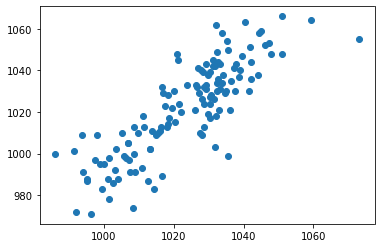

In [41]:
plt.plot(Y_pred_rfr, Y_test_rm, 'o')
plt.show()

### Test pour la prédiction de Re02

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr_re02 = RandomForestRegressor(bootstrap=False, n_jobs=-1)


param_grid = { 
            "min_samples_split" : np.arange(4, 8, 2),
            'max_depth': np.arange(18, 28, 1),
            'max_features': np.arange(12, 18, 1),
            'n_estimators': np.arange(70, 120, 5),
            }

rfr_cv_re02 = GridSearchCV(rfr_re02, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
rfr_cv_re02.fit(X_train_re02, Y_train_re02)

print(rfr_cv_re02.best_estimator_, rfr_cv_re02.best_params_, rfr_cv_re02.best_score_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 15.6min finished


RandomForestRegressor(bootstrap=False, max_depth=26, max_features=17,
                      min_samples_split=4, n_estimators=110, n_jobs=-1) {'max_depth': 26, 'max_features': 17, 'min_samples_split': 4, 'n_estimators': 110} 0.8280356651472974


In [26]:
best_rfr_re02 = rfr_cv_re02.best_estimator_
best_rfr_re02.fit(X_train_re02, Y_train_re02)
print(best_rfr_re02.score(X_train_re02, Y_train_re02))
print(best_rfr_re02.score(X_test_re02, Y_test_re02))

0.9991144097009209
0.8036518463753015


In [27]:
Y_pred_rfr_re02 = best_rfr_re02.predict(X_test_re02)
print(Y_pred_rfr_re02.shape)
print(Y_test_re02.shape)

print("R2_score : ", r2_score(Y_test_re02, Y_pred_rfr_re02))
print("MSE : ", mean_squared_error(Y_test_re02, Y_pred_rfr_re02))

for i in range(len(Y_test_re02)):
    print("Valeur réelle : ",Y_test_re02[i] ,", Valeur prédite : " ,Y_pred_rfr_re02[i], ", |Delta| = ", abs(Y_test_re02[i] - Y_pred_rfr_re02[i] ) )

(129,)
(129,)
R2_score :  0.8036518463753014
MSE :  359.2894405389791
Valeur réelle :  783 , Valeur prédite :  791.2038961038962 , |Delta| =  8.203896103896227
Valeur réelle :  766 , Valeur prédite :  773.7378787878786 , |Delta| =  7.7378787878785715
Valeur réelle :  777 , Valeur prédite :  785.7530303030304 , |Delta| =  8.753030303030414
Valeur réelle :  727 , Valeur prédite :  746.7878787878788 , |Delta| =  19.787878787878753
Valeur réelle :  818 , Valeur prédite :  802.0954545454545 , |Delta| =  15.904545454545541
Valeur réelle :  838 , Valeur prédite :  792.9712121212119 , |Delta| =  45.02878787878808
Valeur réelle :  797 , Valeur prédite :  787.834199134199 , |Delta| =  9.165800865800975
Valeur réelle :  714 , Valeur prédite :  739.9833333333332 , |Delta| =  25.983333333333235
Valeur réelle :  658 , Valeur prédite :  673.109090909091 , |Delta| =  15.109090909091037
Valeur réelle :  812 , Valeur prédite :  782.9909090909091 , |Delta| =  29.0090909090909
Valeur réelle :  705 , Valeu

In [28]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_1_1.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

### Test de la prediction pour A%

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr_A = RandomForestRegressor(bootstrap=False,n_jobs=-1)


param_grid = { 
            "min_samples_split" : np.arange(4, 8, 2),
            'max_depth': np.arange(18, 28, 1),
            'max_features': np.arange(12, 18, 1),
            'n_estimators': np.arange(70, 120, 5),
            }

rfr_cv_A = GridSearchCV(rfr_A, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
rfr_cv_A.fit(X_train_A, Y_train_A)

print(rfr_cv_A.best_estimator_, rfr_cv_A.best_params_, rfr_cv_A.best_score_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 15.1min finished


RandomForestRegressor(bootstrap=False, max_depth=20, max_features=17,
                      min_samples_split=4, n_estimators=110, n_jobs=-1) {'max_depth': 20, 'max_features': 17, 'min_samples_split': 4, 'n_estimators': 110} 0.8173020345304811


In [55]:
best_rfr_A = rfr_cv_A.best_estimator_
best_rfr_A.fit(X_train_A, Y_train_A)
print(best_rfr_A.score(X_train_A, Y_train_A))
print(best_rfr_A.score(X_test_A, Y_test_A))

0.9991673766489093
0.8344958110612433


In [56]:
Y_pred_rfr_A = best_rfr_A.predict(X_test_A)
print(Y_pred_rfr_A.shape)
print(Y_test_A.shape)

print("R2_score : ", r2_score(Y_test_A, Y_pred_rfr_A))
print("MSE : ", mean_squared_error(Y_test_A, Y_pred_rfr_A))

for i in range(len(Y_test_A)):
    print("Valeur réelle : ",Y_test_A[i] ,", Valeur prédite : " ,Y_pred_rfr_A[i], ", |Delta| = ", abs(Y_test_A[i] - Y_pred_rfr_A[i] ) )

(129,)
(129,)
R2_score :  0.8344958110612433
MSE :  35.226484040590876
Valeur réelle :  107 , Valeur prédite :  104.93030303030302 , |Delta| =  2.0696969696969774
Valeur réelle :  105 , Valeur prédite :  109.31363636363636 , |Delta| =  4.313636363636363
Valeur réelle :  102 , Valeur prédite :  97.84242424242426 , |Delta| =  4.157575757575742
Valeur réelle :  108 , Valeur prédite :  111.0545454545455 , |Delta| =  3.0545454545455044
Valeur réelle :  94 , Valeur prédite :  96.53030303030305 , |Delta| =  2.5303030303030454
Valeur réelle :  59 , Valeur prédite :  65.72878787878787 , |Delta| =  6.72878787878787
Valeur réelle :  107 , Valeur prédite :  99.38333333333334 , |Delta| =  7.61666666666666
Valeur réelle :  104 , Valeur prédite :  102.57424242424239 , |Delta| =  1.4257575757576149
Valeur réelle :  120 , Valeur prédite :  112.21515151515155 , |Delta| =  7.784848484848453
Valeur réelle :  97 , Valeur prédite :  94.5469696969697 , |Delta| =  2.453030303030303
Valeur réelle :  92 , Valeu